# **<center>SQL interview Preparation</center>**
* **6 important SQL questions for goods handson including joins, filter, cte and windows function**



In [1]:
#  Installing db-sqlite3 
# !pip install db-sqlite3

In [2]:
import pandas as pd
import sqlite3
from datetime import date

In [3]:
#connecting and creating with the database.
db = sqlite3.connect("testing.db")
db.execute("drop table if exists results")

## **1. Amazon Prime Subscription Rate**
* **Prime subscription rate by product action**
* *Given the following two tables, return the fraction of users, rounded to two decimal places who accessed Amazon music and upgraded to prime membership within the first 30 days of sigining up* 

In [4]:
# Create table
try:
  db.execute("""
  create table users
  (
  user_id integer,
  name varchar(20),
  join_date date
  )""")
  db.execute("""
  create table events
  (
  user_id integer,
  type varchar(10),
  access_date date
  )""")
except:
  print("Already table existed !!")
# Insert values
users = ["""
insert into users values 
(1, 'Jon', '2020-02-14'), 
(2, 'Jane', '2020-02-14'), 
(3, 'Jill', '2020-02-15'), 
(4, 'Josh', '2020-02-15'), 
(5, 'Jean', '2020-02-16'), 
(6, 'Justin', '2020-02-17'),
(7, 'Jeremy', '2020-02-18')"""]
for i in users:
  db.execute(i)
  db.commit()


events = ["""
insert into events values
(1, 'Pay', '2020-03-01'), 
(2, 'Music', '2020-03-02'), 
(2, 'P', '2020-03-12'),
(3, 'Music', '2020-03-15'), 
(4, 'Music', '2020-03-15'), 
(1, 'P', '2020-03-16'), 
(3, 'P', '2020-03-22')
"""]
for i in events:
  db.execute(i)
  db.commit()

In [5]:
qry = """
select * from users;
"""
print("----------------------------------------")
print(pd.read_sql_query(qry, db))

qry = """
select * from events;
"""
print("----------------------------------------")
print(pd.read_sql_query(qry, db))
print("----------------------------------------")

----------------------------------------
   user_id    name   join_date
0        1     Jon  2020-02-14
1        2    Jane  2020-02-14
2        3    Jill  2020-02-15
3        4    Josh  2020-02-15
4        5    Jean  2020-02-16
5        6  Justin  2020-02-17
6        7  Jeremy  2020-02-18
----------------------------------------
   user_id   type access_date
0        1    Pay  2020-03-01
1        2  Music  2020-03-02
2        2      P  2020-03-12
3        3  Music  2020-03-15
4        4  Music  2020-03-15
5        1      P  2020-03-16
6        3      P  2020-03-22
----------------------------------------


**Expected Output:**

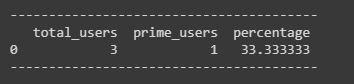

In [6]:
qry = """
select 
count(distinct u.user_id) as total_users,
count(distinct case when ABS(JULIANDAY(u.join_date)-JULIANDAY(e.access_date)) <= 30 then u.user_id end) as prime_users,
1.0*count(distinct case when ABS(JULIANDAY(u.join_date)-JULIANDAY(e.access_date)) <= 30 then u.user_id end)/count(distinct u.user_id)*100 as percentage
from users u
left join events e
on u.user_id = e.user_id and e.type = 'P'
where u.user_id in (select user_id from events where type = 'Music')
"""
print("----------------------------------------")
print(pd.read_sql_query(qry, db))
print("----------------------------------------")

----------------------------------------
   total_users  prime_users  percentage
0            3            1   33.333333
----------------------------------------


## **2. Customer Retention Analysis**
* **Customer Retention**: 
  * *It refers to a company's ability to turn customers into repeat buyers and prevent them from switching to a competitor*
  * *It indicates whether your product and the quality  of your service please yuur existing customers*
  * *Retention period can be different for different industry*

* Example:
  * Jan -  0
  * Feb  - 1,2,3 = count of retention => 3  


In [7]:
# Create table
try:
  db.execute("""
  create table transactions(
  order_id int,
  cust_id int,
  order_date date,
  amount int
  )""")

except:
  print("Already table existed !!")

# Insert values
input_transactions = [ """
insert into transactions values 
(1,1,'2020-01-15',150),
(2,1,'2020-02-10',150),
(3,2,'2020-01-16',150),
(4,2,'2020-02-25',150),
(5,3,'2020-01-10',150),
(6,3,'2020-02-20',150),
(7,4,'2020-01-20',150),
(8,5,'2020-02-20',150)"""]
db.execute(input_transactions[0])

In [8]:
qry = """
select * from transactions;
"""
print("--------------------------------------------")
print(pd.read_sql_query(qry, db))
print("--------------------------------------------")
print(pd.read_sql_query(qry, db))
print("--------------------------------------------")

--------------------------------------------
   order_id  cust_id  order_date  amount
0         1        1  2020-01-15     150
1         2        1  2020-02-10     150
2         3        2  2020-01-16     150
3         4        2  2020-02-25     150
4         5        3  2020-01-10     150
5         6        3  2020-02-20     150
6         7        4  2020-01-20     150
7         8        5  2020-02-20     150
--------------------------------------------
   order_id  cust_id  order_date  amount
0         1        1  2020-01-15     150
1         2        1  2020-02-10     150
2         3        2  2020-01-16     150
3         4        2  2020-02-25     150
4         5        3  2020-01-10     150
5         6        3  2020-02-20     150
6         7        4  2020-01-20     150
7         8        5  2020-02-20     150
--------------------------------------------


**Expected Output:**

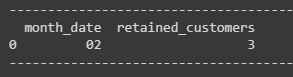

In [9]:
qry = """ 
with cte1 as(
select 
strftime('%m', this_month.order_date) as month_date,
count(distinct last_month.cust_id) as repeat_customers
from transactions this_month
left join transactions last_month
on this_month.cust_id = last_month.cust_id
and abs(strftime('%m', this_month.order_date) - strftime('%m', last_month.order_date)) = 1 
group by strftime('%m', this_month.order_date)
)
select * from cte1 where month_date != '01' 
"""
print("--------------------------------------------")
print(pd.read_sql_query(qry, db))
print("--------------------------------------------")

--------------------------------------------
  month_date  repeat_customers
0         02                 3
--------------------------------------------


## **3. Churn Analysis**

In [10]:
# We are using same table for Retentuon analysis
qry = """
select * from transactions;
"""
print("--------------------------------------------")
print(pd.read_sql_query(qry, db))
print("--------------------------------------------")

--------------------------------------------
   order_id  cust_id  order_date  amount
0         1        1  2020-01-15     150
1         2        1  2020-02-10     150
2         3        2  2020-01-16     150
3         4        2  2020-02-25     150
4         5        3  2020-01-10     150
5         6        3  2020-02-20     150
6         7        4  2020-01-20     150
7         8        5  2020-02-20     150
--------------------------------------------


**Expected Output:**

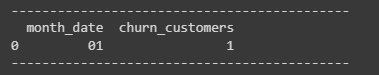

In [21]:
qry = """ 
with cte1 as(
select 
strftime('%m', last_month.order_date) as month_date,
count(distinct last_month.cust_id) as churn_customers
from transactions last_month
left join transactions this_month
on this_month.cust_id = last_month.cust_id
and abs(strftime('%m', this_month.order_date) - strftime('%m', last_month.order_date)) = 1 
where this_month.cust_id is null
group by strftime('%m', last_month.order_date)
)
select * from cte1 where month_date != '02'  
 
"""
print("--------------------------------------------")
print(pd.read_sql_query(qry, db))
print("--------------------------------------------")

--------------------------------------------
  month_date  churn_customers
0         01                1
--------------------------------------------


## **4. Second Most Recent Activity**
* *Get the second most recent activity, if there is only one activity the return one*

In [12]:
# Create table
try:
  db.execute("""
  create table UserActivity
  (
  username varchar(20) ,
  activity varchar(20),
  startDate Date   ,
  endDate Date
  )
  """)
except:
  print("Already table existed !!")

# Insert values
input = ["""
insert into UserActivity values 
('Alice','Travel','2020-02-12','2020-02-20'),
('Alice','Dancing','2020-02-21','2020-02-23'),
('Alice','Travel','2020-02-24','2020-02-28'),
('Bob','Travel','2020-02-11','2020-02-18')
"""]
for i in input:
  db.execute(i)
  db.commit()

In [13]:
qry = """
select 
* 
from UserActivity
"""
print("----------------------------------------------")
print(pd.read_sql_query(qry, db))
print("----------------------------------------------")

----------------------------------------------
  username activity   startDate     endDate
0    Alice   Travel  2020-02-12  2020-02-20
1    Alice  Dancing  2020-02-21  2020-02-23
2    Alice   Travel  2020-02-24  2020-02-28
3      Bob   Travel  2020-02-11  2020-02-18
----------------------------------------------


**Expected Output:**

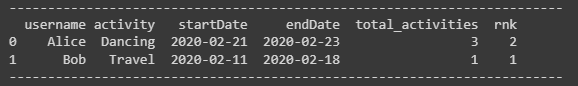

In [14]:
qry = """
with cte1 as(
select 
*,
count(1) over(partition by username) as total_activities,
rank() over( partition by username order by endDate) as rnk 
from UserActivity
)
select * from cte1
where total_activities = 1 or rnk = 2
"""
print("------------------------------------------------------------------------")
print(pd.read_sql_query(qry, db))
print("------------------------------------------------------------------------")


------------------------------------------------------------------------
  username activity   startDate     endDate  total_activities  rnk
0    Alice  Dancing  2020-02-21  2020-02-23                 3    2
1      Bob   Travel  2020-02-11  2020-02-18                 1    1
------------------------------------------------------------------------


## **5. Total charges as per billing rate**

In [15]:
# Create table
try:
  db.execute("""
  create table billings 
  (
  emp_name varchar(10),
  bill_date date,
  bill_rate int
  )
  """)
  db.execute("""
  create table HoursWorked 
  (
  emp_name varchar(20),
  work_date date,
  bill_hrs int
  )
  """)
except:
  print("Already table existed !!")

# Insert values
input_billings = ["""
insert into billings values
('Sachin','1990-01-01',25),
('Sehwag' ,'1989-01-01', 15),
('Dhoni' ,'1989-01-01', 20),
('Sachin' ,'1991-02-05', 30)
"""]
db.execute(input_billings[0])

input_HoursWorked = ["""
insert into HoursWorked values
('Sachin', '1990-07-01' ,3),
('Sachin', '1990-08-01', 5),
('Sehwag','1990-07-01', 2),
('Sachin','1991-07-01', 4)
"""]
db.execute(input_HoursWorked[0])

db.commit()

In [16]:
qry = """
select 
* 
from billings
"""
print("----------------------------------------------")
print(pd.read_sql_query(qry, db))
qry = """
select 
* 
from HoursWorked
"""
print("----------------------------------------------")
print(pd.read_sql_query(qry, db))
print("----------------------------------------------")

----------------------------------------------
  emp_name   bill_date  bill_rate
0   Sachin  1990-01-01         25
1   Sehwag  1989-01-01         15
2    Dhoni  1989-01-01         20
3   Sachin  1991-02-05         30
----------------------------------------------
  emp_name   work_date  bill_hrs
0   Sachin  1990-07-01         3
1   Sachin  1990-08-01         5
2   Sehwag  1990-07-01         2
3   Sachin  1991-07-01         4
----------------------------------------------


**Expected Output:**

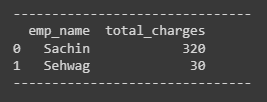

In [17]:
qry = """
with date_range as(
select 
*,
lead(DATE(bill_date, '-1 days'), 1, '9999-12-31') over(partition by emp_name order by bill_date asc) as bill_date_end
from billings
)
select 
hw.emp_name,
sum(dr.bill_rate*hw.bill_hrs) as total_charges
from date_range dr
inner join  HoursWorked hw
on hw.emp_name = dr.emp_name and hw.work_date between dr.bill_date and dr.bill_date_end
group by 1
"""
print("-------------------------------")
print(pd.read_sql_query(qry, db))
print("-------------------------------")


-------------------------------
  emp_name  total_charges
0   Sachin            320
1   Sehwag             30
-------------------------------


## **6. Consecutive Empty Seats**
* 3 or more consecutive empty seats

In [18]:
# Create table
try:
  db.execute("""
  create table bms 
  (seat_no int ,
   is_empty varchar(10))
  """)
except:
  print("Already table existed !!")
  
# Insert values
input_bms = ["""
insert into bms values
(1,'N')
,(2,'Y')
,(3,'N')
,(4,'Y')
,(5,'Y')
,(6,'Y')
,(7,'N')
,(8,'Y')
,(9,'Y')
,(10,'Y')
,(11,'Y')
,(12,'N')
,(13,'Y')
,(14,'Y')
"""]
db.execute(input_bms[0])
db.commit()

In [19]:
qry = """
select 
* 
from bms
"""
print("----------------------------------------------")
print(pd.read_sql_query(qry, db))
print("----------------------------------------------")

----------------------------------------------
    seat_no is_empty
0         1        N
1         2        Y
2         3        N
3         4        Y
4         5        Y
5         6        Y
6         7        N
7         8        Y
8         9        Y
9        10        Y
10       11        Y
11       12        N
12       13        Y
13       14        Y
----------------------------------------------


**Expected Output:**

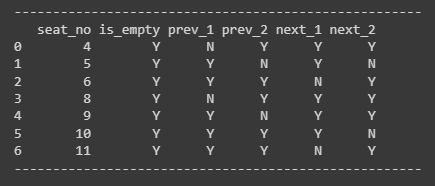

In [20]:
qry = """
select * from (
select 
*,
lag(is_empty,1) over(order by seat_no) as prev_1,
lag(is_empty,2) over(order by seat_no) as prev_2,
lead(is_empty,1) over(order by seat_no) as next_1,
lead(is_empty,2) over(order by seat_no) as next_2
from bms
) A
where is_empty = 'Y' and prev_1 = 'Y' and prev_2 = 'Y' 
or (is_empty = 'Y' and prev_1 = 'Y' and  next_1 ='Y')
or (is_empty = 'Y' and next_1 = 'Y' and  next_2 = 'Y')
"""
print("-----------------------------------------------------")
print(pd.read_sql_query(qry, db))
print("-----------------------------------------------------")

-----------------------------------------------------
   seat_no is_empty prev_1 prev_2 next_1 next_2
0        4        Y      N      Y      Y      Y
1        5        Y      Y      N      Y      N
2        6        Y      Y      Y      N      Y
3        8        Y      N      Y      Y      Y
4        9        Y      Y      N      Y      Y
5       10        Y      Y      Y      Y      N
6       11        Y      Y      Y      N      Y
-----------------------------------------------------


**Source:**
* https://www.youtube.com/playlist?list=PLBTZqjSKn0IeKBQDjLmzisazhqQy4iGkb

# **<center>THE END</center>**